# Kelompok Dicky Adi

## Import necessary library

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

## Import then print the train and test dataset

In [5]:
dfTrain = pd.read_csv('train.csv')
dfTest = pd.read_csv('test.csv')

In [6]:
dfTrain

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0        1          60       RL  ...        WD         Normal    208500
1        2          20       RL  ...        WD         Normal    181500
2        3          60       RL  ...        WD         Normal    223500
3        4          70       RL  ...        WD        Abnorml    140000
4        5          60       RL  ...        WD         Normal    250000
...    ...         ...      ...  ...       ...            ...       ...
1455  1456          60       RL  ...        WD         Normal    175000
1456  1457          20       RL  ...        WD         Normal    210000
1457  1458          70       RL  ...        WD         Normal    266500
1458  1459          20       RL  ...        WD         Normal    142125
1459  1460          20       RL  ...        WD         Normal    147500

[1460 rows x 81 columns]

In [7]:
dfTest

Id  MSSubClass MSZoning  ...  YrSold  SaleType SaleCondition
0     1461          20       RH  ...    2010        WD        Normal
1     1462          20       RL  ...    2010        WD        Normal
2     1463          60       RL  ...    2010        WD        Normal
3     1464          60       RL  ...    2010        WD        Normal
4     1465         120       RL  ...    2010        WD        Normal
...    ...         ...      ...  ...     ...       ...           ...
1454  2915         160       RM  ...    2006        WD        Normal
1455  2916         160       RM  ...    2006        WD       Abnorml
1456  2917          20       RL  ...    2006        WD       Abnorml
1457  2918          85       RL  ...    2006        WD        Normal
1458  2919          60       RL  ...    2006        WD        Normal

[1459 rows x 80 columns]

## Check for the null/nan values from both of the dataset(dataframe)

In [8]:
trainNan = dfTrain.isna().sum()
trainNanList = trainNan[trainNan > 0]
print(trainNanList)

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [9]:
testNan = dfTest.isna().sum()
testNanList = testNan[testNan > 0]
print(testNanList)

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64


## Visualize the nan columns using histogram

Visualizing the training nan values

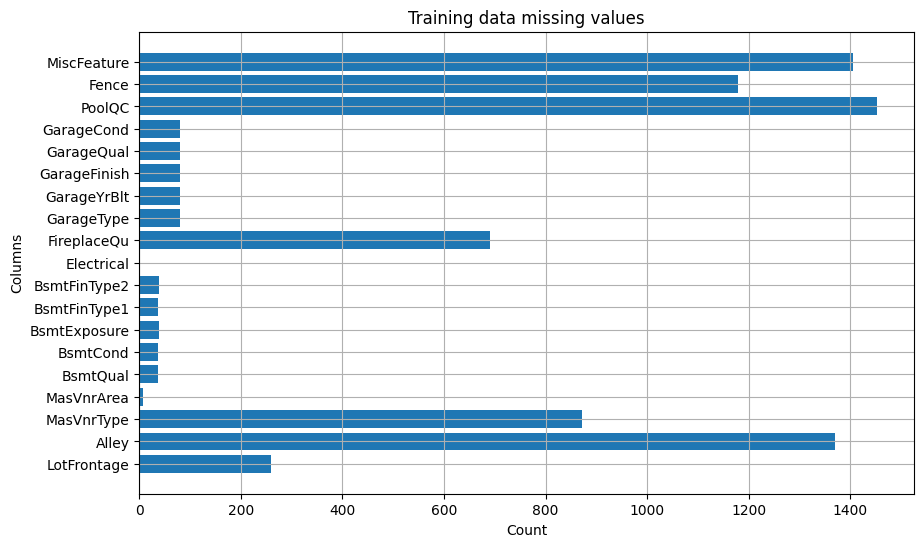

In [10]:
plt.figure(figsize=(10,6))
plt.barh(trainNanList.index, trainNanList)
plt.title('Training data missing values')
plt.xlabel('Count')
plt.ylabel('Columns')
plt.grid()
plt.show()

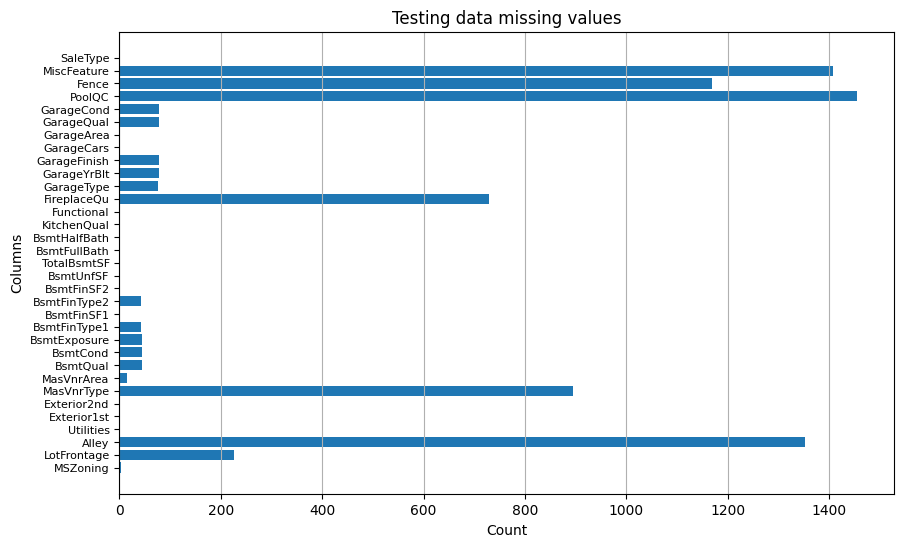

In [11]:
plt.figure(figsize=(10,6))
plt.barh(testNanList.index, testNanList)
plt.title('Testing data missing values')
plt.xlabel('Count')
plt.yticks(fontsize=8)
plt.ylabel('Columns')
plt.grid(axis='x')
plt.show()

Seems like the missing values related to the house doesn't have that corresponding feature. Therefore we can just let them be by imputing the missing values with 'no' since all the missing values likely to be in the categorical values

In [12]:
trainCategoricalCols = dfTrain.select_dtypes(exclude='number').columns.to_list()
trainNumericalCols = dfTrain.select_dtypes(include='number').columns.to_list()

testCategoricalCols = dfTest.select_dtypes(exclude='number').columns.to_list()
testNumericalCols = dfTest.select_dtypes(include='number').columns.to_list()

In [13]:
dfTrain[trainCategoricalCols] = dfTrain[trainCategoricalCols].fillna('no')
dfTrain[trainNumericalCols] = dfTrain[trainNumericalCols].fillna(0) 

In [14]:
dfTest[testCategoricalCols] = dfTest[testCategoricalCols].fillna('no')
dfTest[testNumericalCols] = dfTest[testNumericalCols].fillna(0)

## Categorical values visualization

Since we handle a dataset full with categorical values, we need to visualize it for the sake of data understanding lmao. However, we dont need to know the insight of the test dataset (because it's a test dataset, why would you explore the test dataset!!1!1!!11!! That's why we call it test dataset lmao)

### Training data

In [15]:
trainCategoricalCols = dfTrain.select_dtypes(exclude='number').columns.to_list()
print(trainCategoricalCols)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


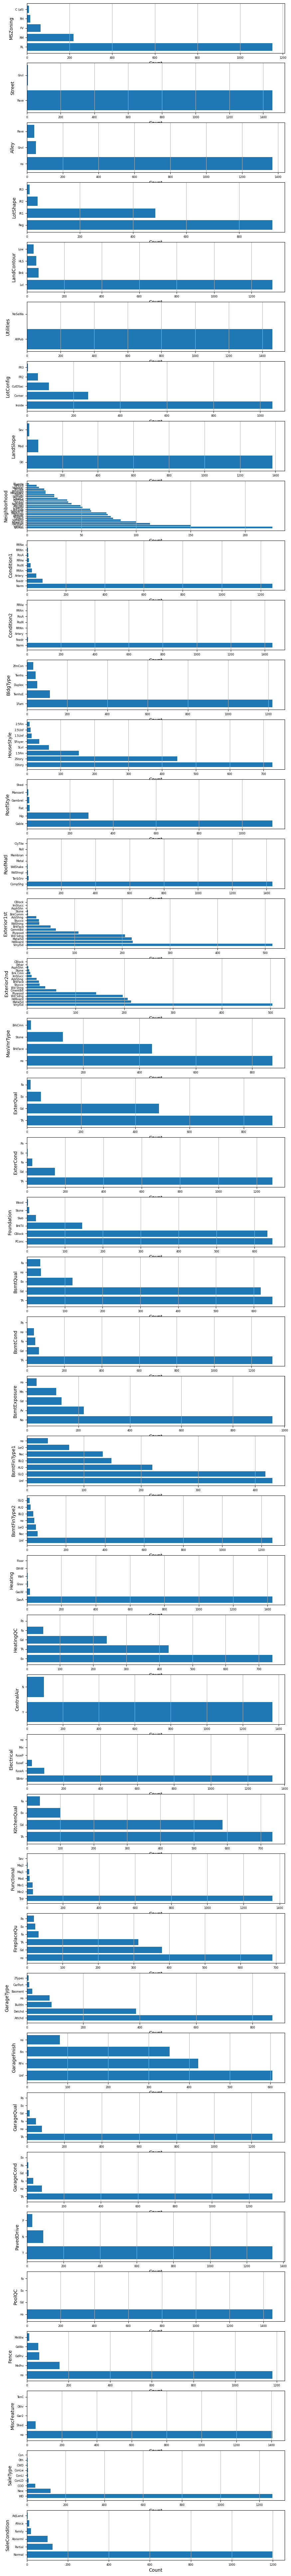

In [16]:
fig, ax = plt.subplots(len(trainCategoricalCols), 1,figsize=(10,100))

for i, cols in enumerate(trainCategoricalCols):
    ax[i].barh(dfTrain[cols].value_counts().index, dfTrain[cols].value_counts().values)
    ax[i].set_ylabel(trainCategoricalCols[i])
    ax[i].tick_params(labelsize=6)
    ax[i].set_xlabel('Count')
    ax[i].grid(axis='x')

Based on SaleCondition visualization, lets see the exact number

In [17]:
dfTrain.groupby('SaleCondition').count()

Id  MSSubClass  MSZoning  ...  YrSold  SaleType  SalePrice
SaleCondition                              ...                             
Abnorml         101         101       101  ...     101       101        101
AdjLand           4           4         4  ...       4         4          4
Alloca           12          12        12  ...      12        12         12
Family           20          20        20  ...      20        20         20
Normal         1198        1198      1198  ...    1198      1198       1198
Partial         125         125       125  ...     125       125        125

[6 rows x 80 columns]

Focused on the Normal SaleCondition and see PoolQC col above, there're 3 house that has a pool. Let's see the pool quality

In [18]:
dfTrain.groupby(['SaleCondition', 'PoolQC']).count()

Id  MSSubClass  MSZoning  ...  YrSold  SaleType  SalePrice
SaleCondition PoolQC                              ...                             
Abnorml       Ex         2           2         2  ...       2         2          2
              no        99          99        99  ...      99        99         99
AdjLand       no         4           4         4  ...       4         4          4
Alloca        Gd         1           1         1  ...       1         1          1
              no        11          11        11  ...      11        11         11
Family        no        20          20        20  ...      20        20         20
Normal        Fa         2           2         2  ...       2         2          2
              Gd         1           1         1  ...       1         1          1
              no      1195        1195      1195  ...    1195      1195       1195
Partial       Gd         1           1         1  ...       1         1          1
              no       124         124       124  ...     124       124        124

[11 rows x 79 columns]

Based on the data above, Seems like Pool quality didn't affect the SaleCondition that much. Let's see the neighborhood cols below

In [19]:
with pd.option_context('display.max_rows', None):
    display(dfTrain.groupby(['Neighborhood', 'SaleCondition']).count().sort_values(by='Id', ascending=False))

Id  MSSubClass  ...  SaleType  SalePrice
Neighborhood SaleCondition                   ...                     
NAmes        Normal         198         198  ...       198        198
CollgCr      Normal         129         129  ...       129        129
OldTown      Normal          94          94  ...        94         94
Edwards      Normal          82          82  ...        82         82
Sawyer       Normal          67          67  ...        67         67
Gilbert      Normal          64          64  ...        64         64
NWAmes       Normal          64          64  ...        64         64
BrkSide      Normal          54          54  ...        54         54
SawyerW      Normal          50          50  ...        50         50
Somerst      Normal          49          49  ...        49         49
NridgHt      Normal          45          45  ...        45         45
Crawfor      Normal          43          43  ...        43         43
Mitchel      Normal          42          42  ...        42         42
NoRidge      Normal          37          37  ...        37         37
Somerst      Partial         33          33  ...        33         33
NridgHt      Partial         32          32  ...        32         32
IDOTRR       Normal          29          29  ...        29         29
Timber       Normal          28          28  ...        28         28
ClearCr      Normal          24          24  ...        24         24
NAmes        Abnorml         23          23  ...        23         23
SWISU        Normal          22          22  ...        22         22
CollgCr      Partial         18          18  ...        18         18
MeadowV      Normal          16          16  ...        16         16
StoneBr      Normal          16          16  ...        16         16
OldTown      Abnorml         12          12  ...        12         12
Gilbert      Partial         12          12  ...        12         12
BrDale       Normal          12          12  ...        12         12
Blmngtn      Normal          12          12  ...        12         12
Veenker      Normal          11          11  ...        11         11
Edwards      Abnorml          8           8  ...         8          8
StoneBr      Partial          8           8  ...         8          8
NPkVill      Normal           8           8  ...         8          8
IDOTRR       Abnorml          7           7  ...         7          7
Timber       Partial          7           7  ...         7          7
NWAmes       Abnorml          6           6  ...         6          6
Sawyer       Abnorml          5           5  ...         5          5
Blmngtn      Partial          5           5  ...         5          5
SawyerW      Alloca           4           4  ...         4          4
NAmes        Family           4           4  ...         4          4
NoRidge      Abnorml          4           4  ...         4          4
Edwards      AdjLand          4           4  ...         4          4
Somerst      Abnorml          4           4  ...         4          4
Edwards      Partial          4           4  ...         4          4
SawyerW      Abnorml          4           4  ...         4          4
OldTown      Family           4           4  ...         4          4
Crawfor      Abnorml          3           3  ...         3          3
BrkSide      Abnorml          3           3  ...         3          3
ClearCr      Abnorml          3           3  ...         3          3
SWISU        Abnorml          3           3  ...         3          3
CollgCr      Abnorml          3           3  ...         3          3
BrDale       Abnorml          3           3  ...         3          3
Mitchel      Abnorml          3           3  ...         3          3
NWAmes       Family           3           3  ...         3          3
Timber       Abnorml          3           3  ...         3          3
Crawfor      Alloca           2           2  ...         2          2
             Family           2        

Based on the data above, seems like there're so many peoples buying a property on NAmes and CollgCr. However, i feel like this approach are exhaustive to analyze the data row by row.

Lets check the correlation heatmap to see the correlated columns. Since the correlation heatmap only takes number as the data, we need to encode all the categorical values using LabelEncoder because the datasets it self already has 80 columns and its kinda too wide and harsh to use one-hot encoding, however we might use the one-hot encoding for experimental purpose later

In [20]:
LE = LabelEncoder()
for cols in trainCategoricalCols:
    dfTrain[cols] = LE.fit_transform(dfTrain[cols])

#Since we're gonna use the test dataset to test the model later, we also need to encode the categorical columns on the test dataset
testCategoricalCols = dfTest.select_dtypes(exclude='number').columns.to_list()
for cols in testCategoricalCols:
    dfTest[cols] = LE.fit_transform(dfTest[cols])

to make sure the categorical values was encoded, lets check it

In [21]:
dfTrain[trainCategoricalCols]

MSZoning  Street  Alley  ...  MiscFeature  SaleType  SaleCondition
0            3       1      2  ...            4         8              4
1            3       1      2  ...            4         8              4
2            3       1      2  ...            4         8              4
3            3       1      2  ...            4         8              0
4            3       1      2  ...            4         8              4
...        ...     ...    ...  ...          ...       ...            ...
1455         3       1      2  ...            4         8              4
1456         3       1      2  ...            4         8              4
1457         3       1      2  ...            2         8              4
1458         3       1      2  ...            4         8              4
1459         3       1      2  ...            4         8              4

[1460 rows x 43 columns]

In [22]:
dfTest[testCategoricalCols]

MSZoning  Street  Alley  ...  MiscFeature  SaleType  SaleCondition
0            2       1      2  ...            3         8              4
1            3       1      2  ...            0         8              4
2            3       1      2  ...            3         8              4
3            3       1      2  ...            3         8              4
4            3       1      2  ...            3         8              4
...        ...     ...    ...  ...          ...       ...            ...
1454         4       1      2  ...            3         8              4
1455         4       1      2  ...            3         8              0
1456         3       1      2  ...            3         8              0
1457         3       1      2  ...            2         8              4
1458         3       1      2  ...            3         8              4

[1459 rows x 43 columns]

Voilaaa, no messy text values lmao

Ok lets do the correlation heatmap

<Axes: >

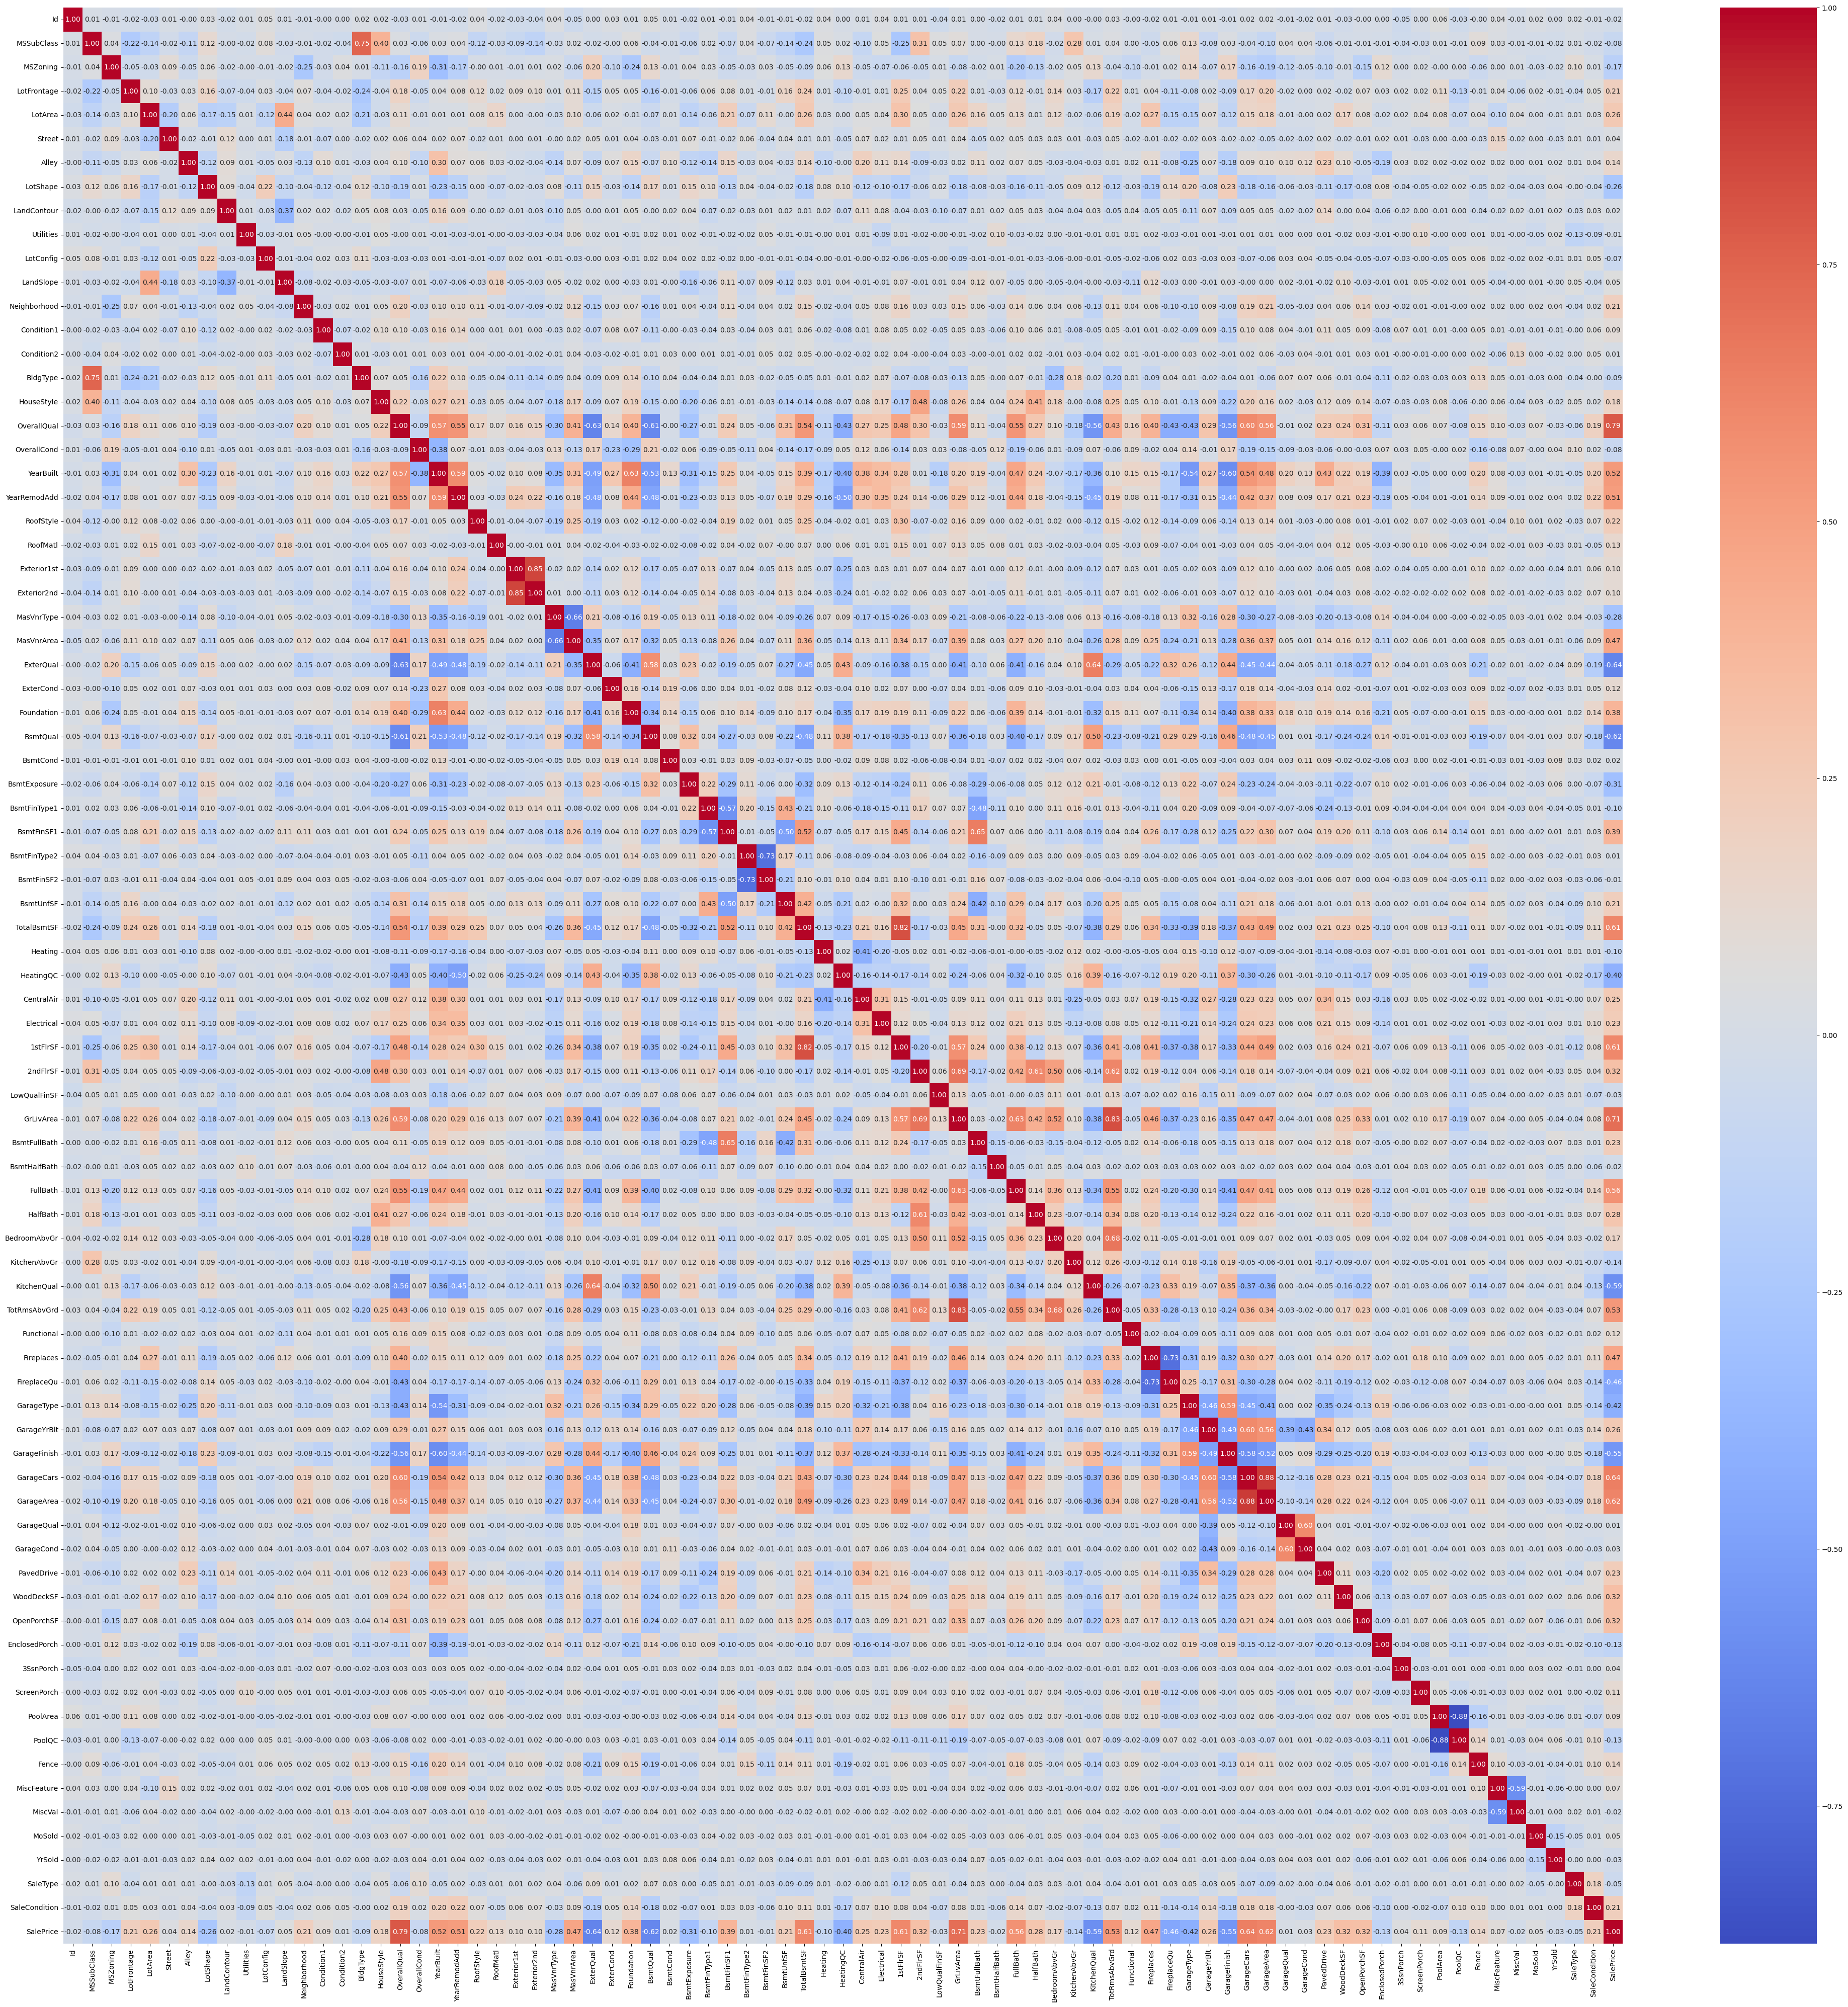

In [23]:
trainCorr = dfTrain.corr()
plt.figure(figsize=(50,50))
sns.heatmap(trainCorr, annot=True, fmt='.2f', cmap='coolwarm')

Look at the heatmap, what a messy figure lmao. However, let's focus on SalePrice column against all other columns, there're so many columns that has high correlation value. Therefore, we take those corresponding columns to fed it to our model. Our hypothesize, the model will have a better r2 score than using all the columns because we're using the high correlated columns and ignore the other noise column/values. However, we might still use all the columns for experimental purposes

Let's take all the > 0.2 correlation values column

In [24]:
targetCols = 'SalePrice'
highCorrCols = trainCorr[trainCorr[targetCols] > 0.2].index.to_list()
highCorrCols.remove('SalePrice')
print(highCorrCols)
print(len(highCorrCols))

['LotFrontage', 'LotArea', 'Neighborhood', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'MasVnrArea', 'Foundation', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'SaleCondition']
29


Okay, since we already have all the high correlated columns. LET THE MODELLING BEGIN!!!11!!1!1

## Modelling

Before we start the training process, let's define a function to do the training and evaluation process to make the code a bit cleaner

In [25]:
def getTrain(xTrain, xVal, yTrain, yVal):
    linReg = LinearRegression()
    linReg.fit(xTrain, yTrain)
    #training
    trainPreds = linReg.predict(xTrain)
    trainr2score = r2_score(yTrain, trainPreds)
    trainmae = mean_absolute_error(yTrain, trainPreds)
    print(f"This model training phase achieveing R2 Score : {trainr2score:.2f} and MAE : {trainmae:.2f}")
    #validation
    preds = linReg.predict(xVal)
    r2score = r2_score(y_true=yVal, y_pred=preds)
    mae = mean_absolute_error(y_true=yVal, y_pred=preds)
    print(f"This model achieving R2 Score : {r2score:.2f} and MAE : {mae:.2f}")
    return (linReg, preds)

We split the dataset into 3 parts consists of training, validation, and testing. Where training and validation using the training dataset and the testing dataset for the test part. On the training and validation split we're using 70:30 ratio and might be changed for experimental purpose.

In [26]:
xTrain, xVal, yTrain, yVal = train_test_split(dfTrain[highCorrCols], dfTrain['SalePrice'], test_size=0.3, random_state=17)

In [27]:
model, preds = getTrain(xTrain, xVal, yTrain, yVal)

This model training phase achieveing R2 Score : 0.79 and MAE : 21808.92
This model achieving R2 Score : 0.83 and MAE : 22119.90


As you can see above, the result was surprisingly kinda good and the model doesn't overfit

Let's see the result by displaying side by side the prediction and validation data

In [28]:
sbs = pd.DataFrame({
    'Prediction' : preds,
    'RealClass' : yVal.values
})
sbs.head()

Prediction  RealClass
0  152007.732842     140000
1  244670.662823     260000
2  227096.374205     253000
3  272955.586824     227000
4  220208.626508     217000

The difference between the prediction and the actual value was kinda bit off but let's consider it as good enough :D

## Experimental

### All data included

In [29]:
xTrain2, xVal2, yTrain2, yVal2 = train_test_split(dfTrain.iloc[:,:-1], dfTrain['SalePrice'], test_size=0.3, random_state=17)

In [30]:
model2, preds2 = getTrain(xTrain2, xVal2, yTrain2, yVal2)

This model training phase achieveing R2 Score : 0.85 and MAE : 19113.37
This model achieving R2 Score : 0.86 and MAE : 19966.14


In [31]:
sbs2 = pd.DataFrame({
    'Prediction' : preds2,
    'RealValue' : yVal2.values
})
sbs2.head()

Prediction  RealValue
0  148275.616818     140000
1  269200.387580     260000
2  229330.702614     253000
3  266741.311737     227000
4  206607.118496     217000

## one-hot encoding instead of label encoding

Since we already modified the real dataframe, we need to specify a fresh dataframe

In [32]:
dfTrain2 = pd.read_csv('train.csv')
dfTest2 = pd.read_csv('test.csv')

In [33]:
dfTrain2

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0        1          60       RL  ...        WD         Normal    208500
1        2          20       RL  ...        WD         Normal    181500
2        3          60       RL  ...        WD         Normal    223500
3        4          70       RL  ...        WD        Abnorml    140000
4        5          60       RL  ...        WD         Normal    250000
...    ...         ...      ...  ...       ...            ...       ...
1455  1456          60       RL  ...        WD         Normal    175000
1456  1457          20       RL  ...        WD         Normal    210000
1457  1458          70       RL  ...        WD         Normal    266500
1458  1459          20       RL  ...        WD         Normal    142125
1459  1460          20       RL  ...        WD         Normal    147500

[1460 rows x 81 columns]

In [34]:
dfTest2

Id  MSSubClass MSZoning  ...  YrSold  SaleType SaleCondition
0     1461          20       RH  ...    2010        WD        Normal
1     1462          20       RL  ...    2010        WD        Normal
2     1463          60       RL  ...    2010        WD        Normal
3     1464          60       RL  ...    2010        WD        Normal
4     1465         120       RL  ...    2010        WD        Normal
...    ...         ...      ...  ...     ...       ...           ...
1454  2915         160       RM  ...    2006        WD        Normal
1455  2916         160       RM  ...    2006        WD       Abnorml
1456  2917          20       RL  ...    2006        WD       Abnorml
1457  2918          85       RL  ...    2006        WD        Normal
1458  2919          60       RL  ...    2006        WD        Normal

[1459 rows x 80 columns]

In [35]:
dfTrain2[trainCategoricalCols] = dfTrain2[trainCategoricalCols].fillna('no')
dfTrain2[trainNumericalCols] = dfTrain2[trainNumericalCols].fillna(0) 

In [36]:
dfTest2[testCategoricalCols] = dfTest2[testCategoricalCols].fillna('no')
dfTest2[testNumericalCols] = dfTest2[testNumericalCols].fillna(0)

In [37]:
dfTrain2

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0        1          60       RL  ...        WD         Normal    208500
1        2          20       RL  ...        WD         Normal    181500
2        3          60       RL  ...        WD         Normal    223500
3        4          70       RL  ...        WD        Abnorml    140000
4        5          60       RL  ...        WD         Normal    250000
...    ...         ...      ...  ...       ...            ...       ...
1455  1456          60       RL  ...        WD         Normal    175000
1456  1457          20       RL  ...        WD         Normal    210000
1457  1458          70       RL  ...        WD         Normal    266500
1458  1459          20       RL  ...        WD         Normal    142125
1459  1460          20       RL  ...        WD         Normal    147500

[1460 rows x 81 columns]

In [38]:
dfTest2

Id  MSSubClass MSZoning  ...  YrSold  SaleType SaleCondition
0     1461          20       RH  ...    2010        WD        Normal
1     1462          20       RL  ...    2010        WD        Normal
2     1463          60       RL  ...    2010        WD        Normal
3     1464          60       RL  ...    2010        WD        Normal
4     1465         120       RL  ...    2010        WD        Normal
...    ...         ...      ...  ...     ...       ...           ...
1454  2915         160       RM  ...    2006        WD        Normal
1455  2916         160       RM  ...    2006        WD       Abnorml
1456  2917          20       RL  ...    2006        WD       Abnorml
1457  2918          85       RL  ...    2006        WD        Normal
1458  2919          60       RL  ...    2006        WD        Normal

[1459 rows x 80 columns]

In [39]:
onehot = OneHotEncoder()

In [40]:
trainEncoded = pd.DataFrame(onehot.fit_transform(dfTrain2[trainCategoricalCols]).toarray(), columns=onehot.get_feature_names_out(trainCategoricalCols))
testEncoded = pd.DataFrame(onehot.fit_transform(dfTest2[testCategoricalCols]).toarray(), columns=onehot.get_feature_names_out(testCategoricalCols))

In [41]:
trainEncoded

MSZoning_C (all)  ...  SaleCondition_Partial
0                  0.0  ...                    0.0
1                  0.0  ...                    0.0
2                  0.0  ...                    0.0
3                  0.0  ...                    0.0
4                  0.0  ...                    0.0
...                ...  ...                    ...
1455               0.0  ...                    0.0
1456               0.0  ...                    0.0
1457               0.0  ...                    0.0
1458               0.0  ...                    0.0
1459               0.0  ...                    0.0

[1460 rows x 267 columns]

In [42]:
testEncoded

MSZoning_C (all)  ...  SaleCondition_Partial
0                  0.0  ...                    0.0
1                  0.0  ...                    0.0
2                  0.0  ...                    0.0
3                  0.0  ...                    0.0
4                  0.0  ...                    0.0
...                ...  ...                    ...
1454               0.0  ...                    0.0
1455               0.0  ...                    0.0
1456               0.0  ...                    0.0
1457               0.0  ...                    0.0
1458               0.0  ...                    0.0

[1459 rows x 255 columns]

In [43]:
dfTrainConcat = pd.concat([dfTrain2[trainNumericalCols], trainEncoded], axis=1)
dfTestConcat = pd.concat([dfTest2[testNumericalCols], testEncoded], axis=1)

In [44]:
dfTrainConcat

Id  MSSubClass  ...  SaleCondition_Normal  SaleCondition_Partial
0        1          60  ...                   1.0                    0.0
1        2          20  ...                   1.0                    0.0
2        3          60  ...                   1.0                    0.0
3        4          70  ...                   0.0                    0.0
4        5          60  ...                   1.0                    0.0
...    ...         ...  ...                   ...                    ...
1455  1456          60  ...                   1.0                    0.0
1456  1457          20  ...                   1.0                    0.0
1457  1458          70  ...                   1.0                    0.0
1458  1459          20  ...                   1.0                    0.0
1459  1460          20  ...                   1.0                    0.0

[1460 rows x 305 columns]

In [45]:
dfTestConcat

Id  MSSubClass  ...  SaleCondition_Normal  SaleCondition_Partial
0     1461          20  ...                   1.0                    0.0
1     1462          20  ...                   1.0                    0.0
2     1463          60  ...                   1.0                    0.0
3     1464          60  ...                   1.0                    0.0
4     1465         120  ...                   1.0                    0.0
...    ...         ...  ...                   ...                    ...
1454  2915         160  ...                   1.0                    0.0
1455  2916         160  ...                   0.0                    0.0
1456  2917          20  ...                   0.0                    0.0
1457  2918          85  ...                   1.0                    0.0
1458  2919          60  ...                   1.0                    0.0

[1459 rows x 292 columns]

In [46]:
xTrain3, xVal3, yTrain3, yVal3 = train_test_split(dfTrainConcat.drop('SalePrice', axis=1), dfTrainConcat['SalePrice'], test_size=0.3, random_state=17)

In [47]:
model3, preds3 = getTrain(xTrain3, xVal3, yTrain3, yVal3)

This model training phase achieveing R2 Score : 0.94 and MAE : 12947.87
This model achieving R2 Score : 0.89 and MAE : 17247.29


In [48]:
sbs3 = pd.DataFrame({
    'Prediction' : np.around(preds3, decimals=0),
    'RealValue' : yVal3.values
})
sbs3.head()

Prediction  RealValue
0    131210.0     140000
1    268010.0     260000
2    231457.0     253000
3    227518.0     227000
4    238013.0     217000

## Using Random Forest Regressor

In [49]:
def getRFtrain(xTrain, xVal, yTrain, yVal, n_estimator = None, max_depth = None, criterion = 'squared_error'):
    if n_estimator or max_depth or criterion:
        n_estimatorVal = 100 if n_estimator==None else n_estimator
        rf = RandomForestRegressor(n_estimators=n_estimatorVal, max_depth=max_depth, criterion=criterion, random_state=17)
    else:
        rf = RandomForestRegressor()
    rf.fit(xTrain, yTrain)
    #training
    trainPreds = rf.predict(xTrain)
    trainr2score = r2_score(yTrain, trainPreds)
    trainmae = mean_absolute_error(yTrain, trainPreds)
    print(f"This model training phase achieveing R2 Score : {trainr2score:.2f} and MAE : {trainmae:.2f}")
    #validation
    preds = rf.predict(xVal)
    r2score = r2_score(y_true=yVal, y_pred=preds)
    mae = mean_absolute_error(y_true=yVal, y_pred=preds)
    print(f"This model achieving R2 Score : {r2score:.2f} and MAE : {mae:.2f}")
    return (rf, preds)

In [50]:
rf, preds4 = getRFtrain(xTrain, xVal, yTrain, yVal)

This model training phase achieveing R2 Score : 0.98 and MAE : 6691.17
This model achieving R2 Score : 0.87 and MAE : 17940.49


In [51]:
sbs4 = pd.DataFrame({
    'Prediction' : np.around(preds4, decimals=0),
    'RealValue' : yVal.values
})
sbs4.head()

Prediction  RealValue
0    162349.0     140000
1    241998.0     260000
2    237610.0     253000
3    261077.0     227000
4    209263.0     217000

### Random Forest using all data

In [52]:
rf2, preds5 = getRFtrain(xTrain2, xVal2, yTrain2, yVal2)

This model training phase achieveing R2 Score : 0.98 and MAE : 6629.38
This model achieving R2 Score : 0.87 and MAE : 17461.33


### Random Forest using one-hot encoded label

In [53]:
rf3, preds6 = getRFtrain(xTrain3, xVal3, yTrain3, yVal3)

This model training phase achieveing R2 Score : 0.98 and MAE : 6796.99
This model achieving R2 Score : 0.87 and MAE : 17487.80


## Using Decision Tree Regressor

In [54]:
def getDTtrain(xTrain, xVal, yTrain, yVal, max_depth = None, criterion = 'squared_error'):
    if max_depth or criterion:
        rf = DecisionTreeRegressor(max_depth=max_depth, criterion=criterion, random_state=17)
    else:
        rf = DecisionTreeRegressor()
    rf.fit(xTrain, yTrain)
    #training
    trainPreds = rf.predict(xTrain)
    trainr2score = r2_score(yTrain, trainPreds)
    trainmae = mean_absolute_error(yTrain, trainPreds)
    print(f"This model training phase achieveing R2 Score : {trainr2score:.2f} and MAE : {trainmae:.2f}")
    #validation
    preds = rf.predict(xVal)
    r2score = r2_score(y_true=yVal, y_pred=preds)
    mae = mean_absolute_error(y_true=yVal, y_pred=preds)
    print(f"This model achieving R2 Score : {r2score:.2f} and MAE : {mae:.2f}")
    return (rf, preds)

In [55]:
dc, preds7 = getDTtrain(xTrain, xVal, yTrain, yVal)

This model training phase achieveing R2 Score : 1.00 and MAE : 7.34
This model achieving R2 Score : 0.74 and MAE : 27615.52


### Decision tree with all data

In [56]:
dc2, preds8 = getDTtrain(xTrain2, xVal2, yTrain2, yVal2)

This model training phase achieveing R2 Score : 1.00 and MAE : 0.00
This model achieving R2 Score : 0.76 and MAE : 26121.80


### Decision tree with one-hot encoded label

In [57]:
dc3, preds9 = getDTtrain(xTrain3, xVal3, yTrain3, yVal3)

This model training phase achieveing R2 Score : 1.00 and MAE : 0.00
This model achieving R2 Score : 0.76 and MAE : 26219.99


Since all the decision trees model were highly overfitted, we're ditching the decision tree from our list of model that will be used

## XGBRegressor

Since XGBoost is tree based model, therefore we decide to use this algorithm

In [97]:
def getTrain(xTrain, xVal, yTrain, yVal):
    xgb = XGBRegressor(seed = 17, learning_rate=0.1)
    xgb.fit(xTrain, yTrain)
    #training
    trainPreds = xgb.predict(xTrain)
    trainr2score = r2_score(yTrain, trainPreds)
    trainmae = mean_absolute_error(yTrain, trainPreds)
    print(f"This model training phase achieveing R2 Score : {trainr2score:.2f} and MAE : {trainmae:.2f}")
    #validation
    preds = xgb.predict(xVal)
    r2score = r2_score(y_true=yVal, y_pred=preds)
    mae = mean_absolute_error(y_true=yVal, y_pred=preds)
    print(f"This model achieving R2 Score : {r2score:.2f} and MAE : {mae:.2f}")
    return (xgb, preds)

In [98]:
xgbModel, preds10 = getTrain(xTrain, xVal, yTrain, yVal)

This model training phase achieveing R2 Score : 1.00 and MAE : 4123.00
This model achieving R2 Score : 0.87 and MAE : 18185.30


In [99]:
sbs5 = pd.DataFrame({
    'Prediction' : np.around(preds10, decimals=0),
    'RealValue' : yVal.values
})
sbs5.head()

Prediction  RealValue
0    136805.0     140000
1    254699.0     260000
2    236542.0     253000
3    257232.0     227000
4    206778.0     217000

### XGBRegressor using all the data

In [100]:
xgbModel2, preds11 = getTrain(xTrain2, xVal2, yTrain2, yVal2)

This model training phase achieveing R2 Score : 1.00 and MAE : 3225.20
This model achieving R2 Score : 0.88 and MAE : 16508.14


In [102]:
sbs6 = pd.DataFrame({
    'Prediction' : np.around(preds11, decimals=0),
    'RealValue' : yVal2.values
})
sbs6.head()

Prediction  RealValue
0    124237.0     140000
1    257442.0     260000
2    238375.0     253000
3    260582.0     227000
4    219014.0     217000

### XGBRegressor using one-hot encoded label

In [101]:
xgbModel3, preds12 = getTrain(xTrain3, xVal3, yTrain3, yVal3)

This model training phase achieveing R2 Score : 1.00 and MAE : 3390.52
This model achieving R2 Score : 0.87 and MAE : 16963.27


# Conclussion

Based on the experimental that has been done, seems like the best performance achieved by linear regression. Therefore, we're using the linear regression with all the data to predict the test set